# Homework 09
This homework is based on the classification and regression lectures.

## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentences) definition for each vocab word. If it can be summarized by a formula, give the formula. 

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** | converts each category into a seperate binary (0/1) column  | 
| **Feature selection*** | process of restricting our regressions to the most important variables |
| **Classifier** | a model that assigns input categories instead of predicting numeric values |
| **Precision** | the proportion of predicted positive values that are actually positive |
| **Recall** | the proportion of actual positives correctly identified |
| **F1 Score** | the mean of precision and recall |
| **Parsimonious model** | a model that explains the data using the fewest possible parameters  |
| **Ridge regression** | adds an L2 penalty that shrinks coefficients toward zero to reduce overfitting but keeps all predictors |
| **LASSO regression** | adds an L2 penalty that can shrink some coefficients exactly to zero, performing variable selection |
| **Cross validation** | repeatedly splits data into training/testing folds to better estimate model performance and perform variable selection |
| **Tree based methods** | split data into branches based on variable thresholds to make predictions |

*Just give the general idea.

## Question 2 
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?
#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?

A perfect classifier on a ROC curve looks like a rectangle. A bad classifier looks like the line y=x. 

When the F1 score is close to 1, there is high precision and high recall. When the F1 score is close to 0, the model has low precision and low recall. 

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** | linear | s-shaped curve |
| **Dependent Variable Type** | continuous (numeric) | categorical |
| **Purpose** (regression or classification) | regression | classification |
| **Range of output variable** ($y_i$ or $p_i$) | $y_i$ $(-infinity, infinity)$ | $p_i$ $(0,1)$ |
| **Method*** | ordinary least squares | maximum likelihood estimation |
| **Example of use** | predicting average BMI based on age, diet, and physical activity levels | estimating the odds of developing diabetes based on age, diet, and physical activity levels |  
  
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).

It is important to train then test our model because we need to evaluate how well it can generalize and make predictions on unseen/new data. This can help with overfitting so that the model does not get used to the data itself, but rather understanding the relationships within the data so that the model can be applied to other data sets. 

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
housing <- read_csv("housing.csv")

Rows: 20640 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (8): longitude, latitude, housing_median_age, total_rooms, population, h...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(housing) 
summary(housing) 
glimpse(housing) 

longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-122.23,37.88,41,880,322,126,8.3252,452600
-122.22,37.86,21,7099,2401,1138,8.3014,358500
-122.24,37.85,52,1467,496,177,7.2574,352100
-122.25,37.85,52,1274,558,219,5.6431,341300
-122.25,37.85,52,1627,565,259,3.8462,342200
-122.25,37.85,52,919,413,193,4.0368,269700


   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
   population      households     median_income     median_house_value
 Min.   :    3   Min.   :   1.0   Min.   : 0.4999   Min.   : 14999    
 1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634   1st Qu.:119600    
 Median : 1166   Median : 409.0   Median : 3.5348   Median :179700    
 Mean   : 1425   Mean   : 499.5   Mean   : 3.8707   Mean   :206856    
 3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432   3rd Qu.:264725    
 Max.   :35682   Max.   :6082.0   Max.   :15.0001   Max.   :500001    

Rows: 20,640
Columns: 8
$ longitude          <dbl> -122.23, -122.22, -122.24, -122.25, -122.25, -122.2…
$ latitude           <dbl> 37.88, 37.86, 37.85, 37.85, 37.85, 37.85, 37.84, 37…
$ housing_median_age <dbl> 41, 21, 52, 52, 52, 52, 52, 52, 42, 52, 52, 52, 52,…
$ total_rooms        <dbl> 880, 7099, 1467, 1274, 1627, 919, 2535, 3104, 2555,…
$ population         <dbl> 322, 2401, 496, 558, 565, 413, 1094, 1157, 1206, 15…
$ households         <dbl> 126, 1138, 177, 219, 259, 193, 514, 647, 595, 714, …
$ median_income      <dbl> 8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6…
$ median_house_value <dbl> 452600, 358500, 352100, 341300, 342200, 269700, 299…


Linear regression is appropriate here because we want to predict median house value, and the variable median_house_value is a continuous variable, and the other predictor values are numeric. 

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [4]:
scale <- function(a){
  (a - min(a))/(max(a)-min(a))
}

housing_num <- housing %>% select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

set.seed(123) 
train <- runif(nrow(housing_num)) < 0.75
test <- !train

#### c) Fit the model.

In [5]:
f <- median_house_value ~ longitude + latitude + housing_median_age + total_rooms + population + households + median_income

m <- lm(f, data=housing_num %>% filter(train))
summary(m)


Call:
lm(formula = f, data = housing_num %>% filter(train))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11495 -0.09080 -0.02335  0.06400  1.00888 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.728806   0.015356   47.46   <2e-16 ***
longitude          -0.868215   0.016894  -51.39   <2e-16 ***
latitude           -0.817586   0.015007  -54.48   <2e-16 ***
housing_median_age  0.122501   0.005194   23.59   <2e-16 ***
total_rooms        -0.065063   0.065076   -1.00    0.317    
population         -3.526248   0.092512  -38.12   <2e-16 ***
households          1.967049   0.062952   31.25   <2e-16 ***
median_income       1.143536   0.010837  105.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1425 on 15556 degrees of freedom
Multiple R-squared:  0.6399,	Adjusted R-squared:  0.6397 
F-statistic:  3948 on 7 and 15556 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

Warning message in geom_segment(aes(x = 0, y = 0, xend = 1, yend = 1)):
“All aesthetics have length 1, but the data has 5076 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


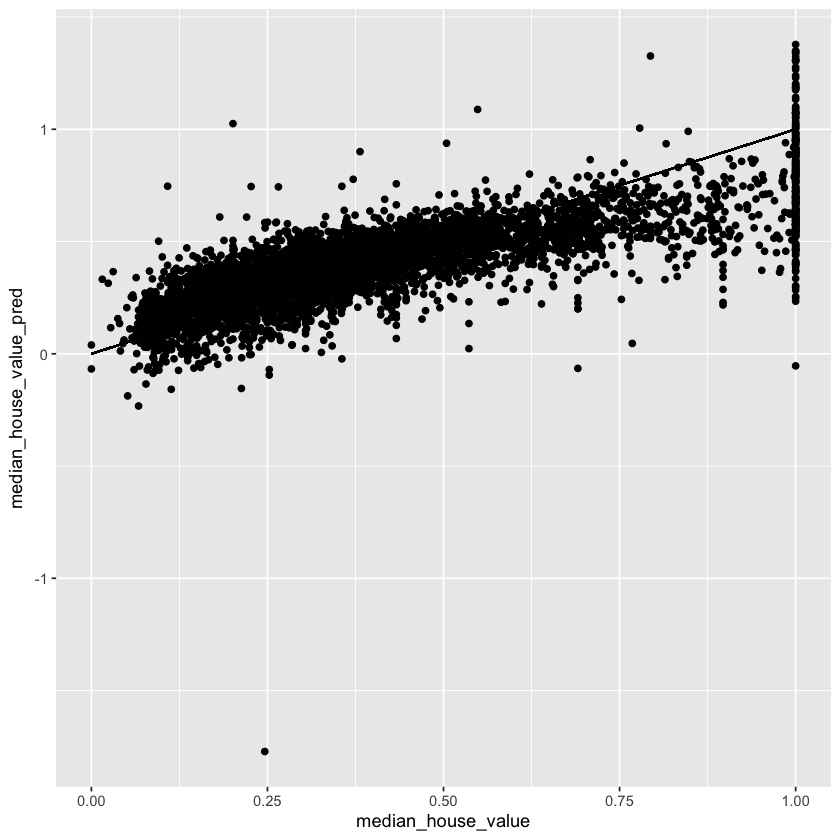

In [6]:
housingx <- housing_num %>% filter(test)

housingx <- housingx %>% 
  mutate(median_house_value_pred = predict(m, housingx %>% as.data.frame()))

ggplot(housingx, aes(median_house_value, median_house_value_pred)) + geom_point() + geom_segment(aes(x=0,y=0,xend=1,yend=1))

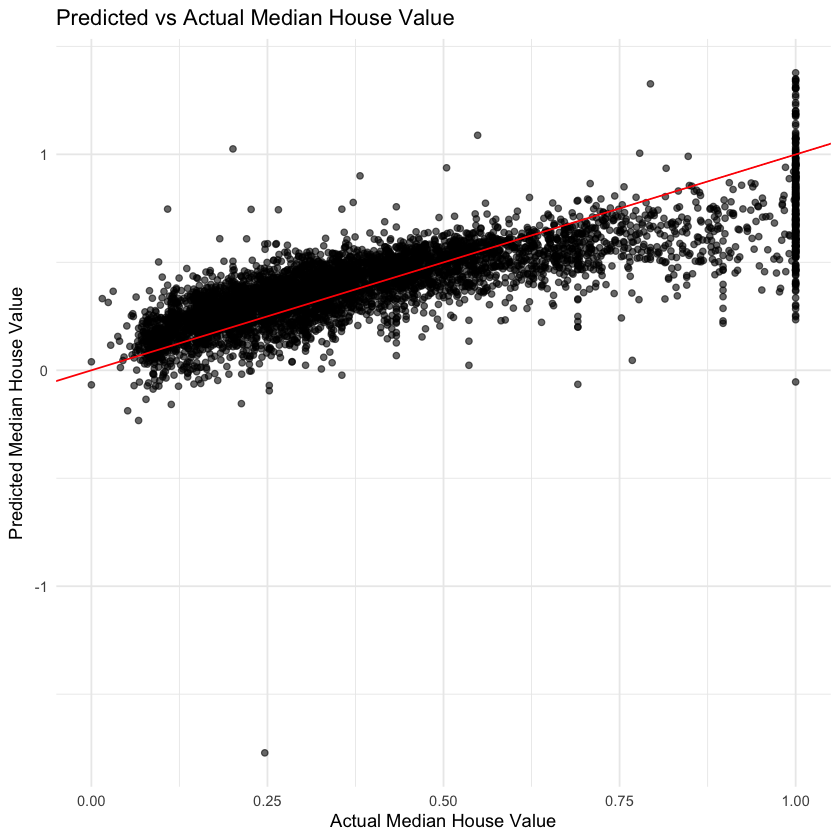

In [7]:
ggplot(housingx, aes(median_house_value, median_house_value_pred)) +
  geom_point(alpha = 0.6) +
  geom_abline(intercept = 0, slope = 1, color = "red") +
  labs(
    x = "Actual Median House Value",
    y = "Predicted Median House Value",
    title = "Predicted vs Actual Median House Value"
  ) +
  theme_minimal()

#### e) Make a residuals plot.


Call:
lm(formula = f, data = housing_num %>% filter(train))

Coefficients:
       (Intercept)           longitude            latitude  housing_median_age  
           0.72881            -0.86822            -0.81759             0.12250  
       total_rooms          population          households       median_income  
          -0.06506            -3.52625             1.96705             1.14354  


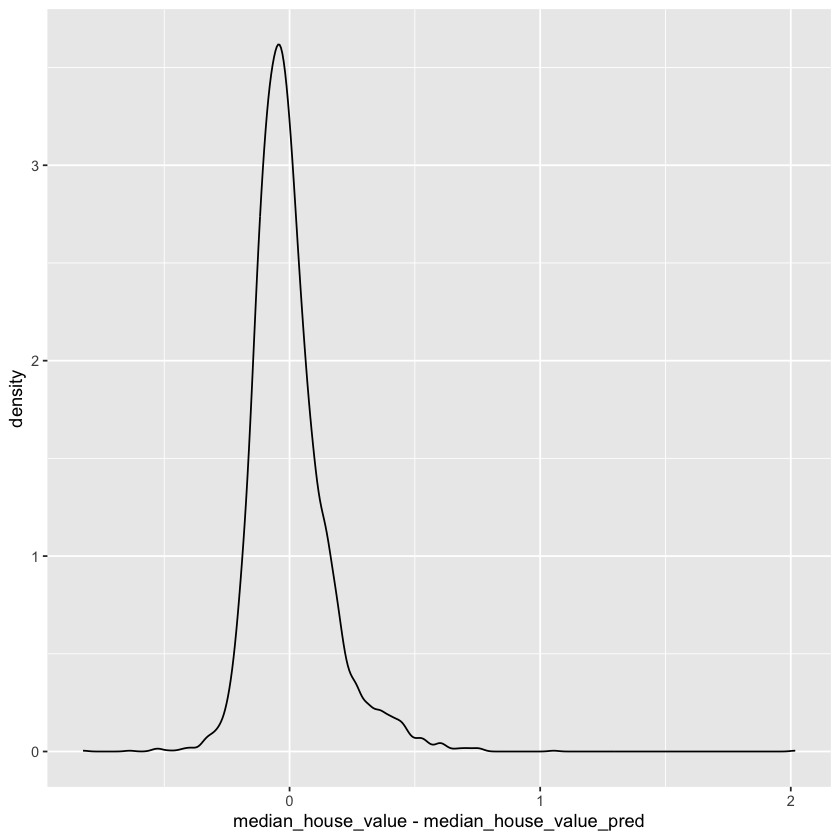

In [8]:
ggplot(housingx, aes(median_house_value-median_house_value_pred)) + geom_density()

m

## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables. 
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?

In [9]:
diabetes <- read_csv("diabetes.csv") 

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
head(diabetes) 
summary(diabetes) 
glimpse(diabetes) 

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

Rows: 768
Columns: 9
$ Pregnancies              <dbl> 6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, 1, …
$ Glucose                  <dbl> 148, 85, 183, 89, 137, 116, 78, 115, 197, 125…
$ BloodPressure            <dbl> 72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92, 74…
$ SkinThickness            <dbl> 35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, 0, …
$ Insulin                  <dbl> 0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, 0, …
$ BMI                      <dbl> 33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.…
$ DiabetesPedigreeFunction <dbl> 0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2…
$ Age                      <dbl> 50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 3…
$ Outcome                  <dbl> 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, …


Logistic regression is appropriate here because the variable of interest is diabetes which is a binary variable, and logistic regression models probabilities between 0 and 1.

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [11]:
scale <- function(x){
  (x - min(x)) / (max(x) - min(x))
}

diabetes_num <- diabetes %>%
  mutate(across(where(is.numeric), scale))

set.seed(123)
n <- nrow(diabetes_num)
train_idx <- sample.int(n, size = floor(0.75 * n))

diabetes_train <- diabetes_num %>% slice(train_idx)
diabetes_test  <- diabetes_num %>% slice(setdiff(seq_len(n), train_idx))

#### c) Fit the model.

In [12]:
f <- Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness +
              Insulin + BMI + DiabetesPedigreeFunction + Age

m <- glm(f, data = diabetes_train, family = binomial())

summary(m)


Call:
glm(formula = f, family = binomial(), data = diabetes_train)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -8.0501     0.7875 -10.223  < 2e-16 ***
Pregnancies                1.9808     0.6376   3.107  0.00189 ** 
Glucose                    7.3239     0.8832   8.293  < 2e-16 ***
BloodPressure             -1.6659     0.7236  -2.302  0.02131 *  
SkinThickness              0.4781     0.7778   0.615  0.53875    
Insulin                   -1.1441     0.8556  -1.337  0.18117    
BMI                        5.7136     1.1584   4.932 8.12e-07 ***
DiabetesPedigreeFunction   1.6852     0.7724   2.182  0.02912 *  
Age                        0.9522     0.6526   1.459  0.14456    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 538.57  on 567  degrees of freedom
AIC: 556.57

Number of 

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy. 

In [13]:
p <- predict(m, newdata = diabetes_test, type = "response")
pred <- as.integer(p >= 0.5)
truth <- diabetes_test$Outcome

tp <- sum(pred == 1 & truth == 1)
fp <- sum(pred == 1 & truth == 0)
tn <- sum(pred == 0 & truth == 0)
fn <- sum(pred == 0 & truth == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)

diabetesf <- tibble(
  measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value   = c(tp, fp, tn, fn, acc)
)

diabetesf     

measure,value
<chr>,<dbl>
True Positive,36.0000000
False Positive,13.0000000
True Negative,112.0000000
False Negative,31.0000000
Accuracy,0.7708333


#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?

In [14]:
diabetes <- read_csv("diabetes.csv") 

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [15]:
install.packages("glmnet")


The downloaded binary packages are in
	/var/folders/yh/x49cjjwn6w1c2sjv6g2r8ktm0000gn/T//RtmpxwX2fH/downloaded_packages


In [19]:
library(glmnet)

In [21]:
x <- model.matrix(Outcome ~ ., data = diabetes)[, -1]  
y <- diabetes$Outcome

In [25]:
set.seed(123)

diabetes <- read_csv("diabetes.csv")

x <- model.matrix(Outcome ~ ., data = diabetes)[, -1] 
y <- diabetes$Outcome                        

lasso_mod <- cv.glmnet(x, y, alpha = 1, family = "binomial")

coef_lasso <- coef(lasso_mod, s = "lambda.min")
coef_lasso

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


9 x 1 sparse Matrix of class "dgCMatrix"
                            lambda.min
(Intercept)              -8.0158479903
Pregnancies               0.1149281457
Glucose                   0.0334154233
BloodPressure            -0.0106840362
SkinThickness             .           
Insulin                  -0.0008077773
BMI                       0.0826753060
DiabetesPedigreeFunction  0.8382120556
Age                       0.0133814644

The variables that are most important/ don't go to zero include Pregnancies, Glucose, BloodPressure, Insulin, BMI, DiabetesPedigreeFunction, and Age. The most important variable is DiabetesPedigreeFunction since it has the largest effect.

In [26]:
lasso_acc

[1] 0.7799479

In [ ]:
The LASSO model slightly improved the accuracy. 

#### f) Make a plot of actual vs. predicted values for the LASSO model.

`geom_smooth()` using formula = 'y ~ x'


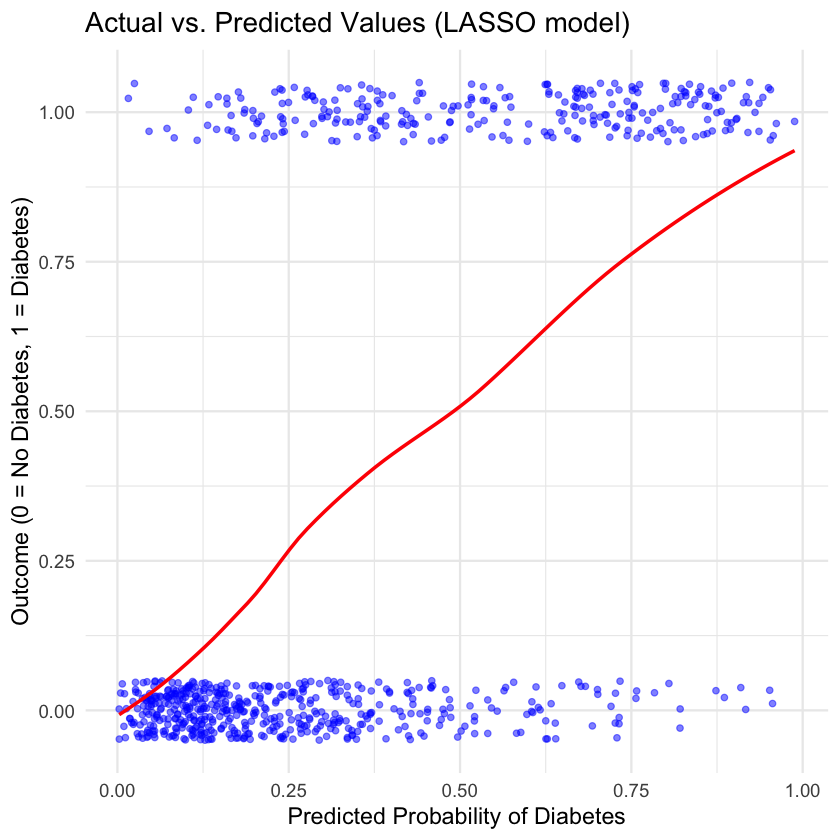

In [28]:
pred_prob <- predict(lasso_mod, newx = x, s = "lambda.min", type = "response")

lasso_results <- data.frame(
  Actual = y,
  Predicted_Prob = as.numeric(pred_prob)
)

ggplot(lasso_results, aes(x = Predicted_Prob, y = Actual)) +
  geom_jitter(height = 0.05, width = 0, alpha = 0.5, color = "blue") +
  geom_smooth(method = "loess", se = FALSE, color = "red") +
  labs(
    title = "Actual vs. Predicted Values (LASSO model)",
    x = "Predicted Probability of Diabetes",
    y = "Outcome (0 = No Diabetes, 1 = Diabetes)"
  ) +
  theme_minimal(base_size = 14)